## Métodos de Otimização: Métodos Heuristicos

### Recozimento Simulado

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
from scipy.stats import qmc

In [2]:
def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

In [55]:
# Método Baseado no algoritmo de Metropolis-Hasting
T = 600 #Temperatura inicial

nvar=2
Ns=20
Nit=5
RT=0.8
xnew=np.zeros(nvar, dtype='float')
xold=np.zeros(nvar, dtype='float')
xbest=np.zeros(nvar, dtype='float')
N=np.zeros(nvar, dtype='float')
layout = "{0:.5f}"

#chute incial:
x1 = 3
x2 = 3

xold[0]=x1; xold[1]=x2; Fold = f(xold)
xbest = xold.copy(); fbest = f(xold)
V = 0.1
niter = 0
while niter<10:
    for k in range(0,Nit):
        for j in range(0,Ns):
            for i in range(0,nvar):
                xnew = xold.copy()
                R = random.uniform(-1,1)
                xnew[i] = xold[i] + R*V
                Fnew = f(xnew)
                if f(xnew) < f(xold):
                    xold[i] = xnew[i]
                    if f(xnew) < fbest:
                        fbest = f(xnew)
                        xbest = xnew.copy()
                else:
                    P = np.exp(np.abs(f(xnew)-f(xold))/T)
                    R = random.uniform(0,1)
                    if P > R:
                        xold[i] = xnew[i]
                        N[i] = N[i] + 1
        V = 0.1
        
    T = T*RT
    print(layout.format(xbest[0])+" "+layout.format(xbest[1])+" "+layout.format(fbest))
    niter += 1

3.14327 3.21897 -2.03274
4.41306 2.70298 -6.82977
4.63830 4.44933 -13.64501
4.90287 4.50173 -15.04566
5.30416 4.83252 -17.43884
5.30416 4.83252 -17.43884
5.30416 4.83252 -17.43884
5.30416 4.83252 -17.43884
5.30416 4.83252 -17.43884
5.30416 4.83252 -17.43884


In [56]:
print(T)

64.42450944000005


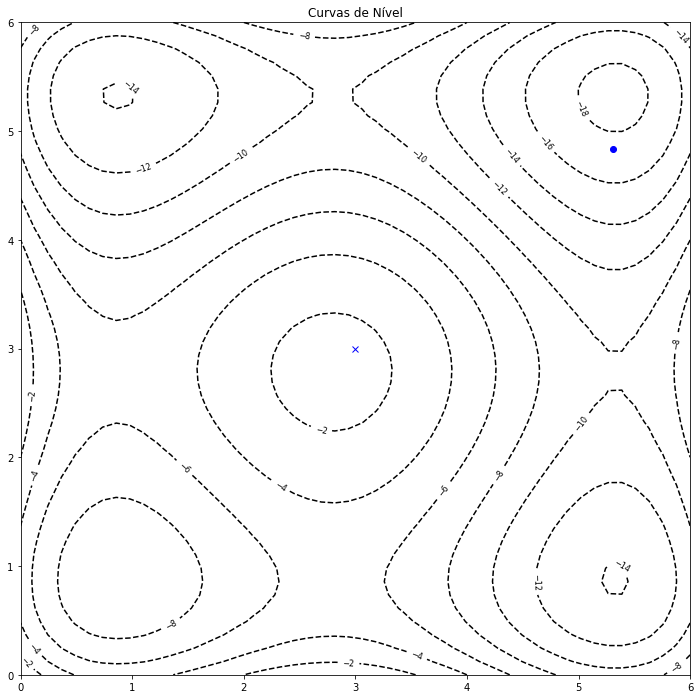

In [57]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(xbest[0], xbest[1], 'bo')
plt.plot(x1, x2, 'bx')
plt.show()